### Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dat.csv")

In [3]:
X = df[['x1','x2']].values

In [4]:
mean_X = np.mean(X,axis=0)

In [5]:
std_dev = np.std(X,axis=0)

In [6]:
X_stand = (X - mean_X)/std_dev

In [7]:
cov_matrix = np.cov(X_stand.T)

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [9]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors = eigenvectors[sorted_indices]

In [12]:
# Step 4: Calculate the scores (position)
scores = X_stand@eigenvectors

# Step 5: Calculate the loadings (rotation)
loadings = eigenvectors

# Step 6: Calculate explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Print the results
print("Scores (Position):")
print(scores)

print("\nLoadings (Rotation):")
print(loadings)

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

Scores (Position):
[[-1.2644963  -0.406847  ]
 [-1.65433688 -0.01700642]
 [-1.52577202  0.11155845]
 [-1.00736656 -0.14971727]
 [-1.26864228  0.36868819]
 [ 0.6722687  -0.02944436]
 [ 1.31923903 -0.1621552 ]
 [ 1.05796331  0.35625025]
 [ 1.96620936 -0.29486605]
 [ 1.70493364  0.2235394 ]]

Loadings (Rotation):
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

Explained Variance Ratio:
[0.03137983 0.96862017]


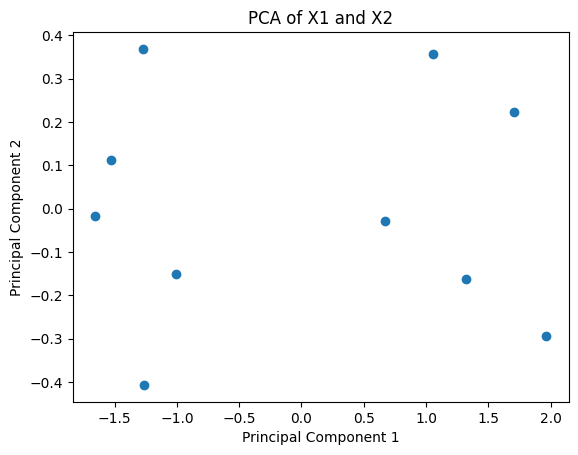

In [13]:
pc_df = pd.DataFrame(data=scores, columns=['PC1', 'PC2'])

plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of X1 and X2')
plt.show()

### Task 2

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


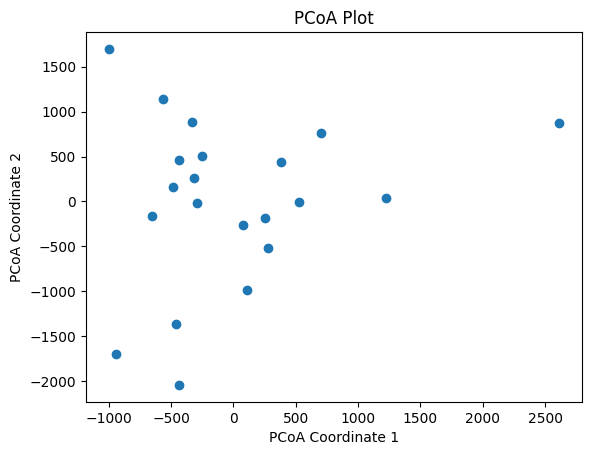

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

distance_matrix = pd.read_csv('eurodist.csv', index_col=0)

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coordinates = mds.fit_transform(distance_matrix)

pcoa_df = pd.DataFrame(data=coordinates, columns=['Coordinate1', 'Coordinate2'])

plt.scatter(pcoa_df['Coordinate1'], pcoa_df['Coordinate2'])
plt.xlabel('PCoA Coordinate 1')
plt.ylabel('PCoA Coordinate 2')
plt.title('PCoA Plot')
plt.show()

### Task 3

a) Yes, if we use Euclidean distance, then PCoA is idenctial to PCA.

b) We can set a threshold for the amount of variance that want to retain, and select the number of dimensions that collectively explain at least that amount of variance.